# Bank Note Authentication
## In this project, we will be analyzing bank note data and try to classify them as either forged or genuine based on their attributes.

Data Set Information:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
For digitization, an industrial camera usually used for print inspection was used. 
The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object 
gray-scale pictures with a resolution of about 660 dpi were gained. 
Wavelet Transform tool were used to extract features from images.
Source:

Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de)
Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de)
Date received: August, 2012

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)


Relevant Papers:

paper submitted (info will be uploaded asap)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

### The data is properly balanced with 762 forged and 610 genuine notes.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### No missing values in the dataset.
### All attributes have proper data types.

In [10]:
df[df.duplicated(keep=False)].sort_values(by='variance')

,variance,skewness,curtosis,entropy,class
727,-2.6479,10.1374,-1.3310,-5.4707,0
227,-2.6479,10.1374,-1.3310,-5.4707,0
604,-2.6479,10.1374,-1.3310,-5.4707,0
345,-1.8584,7.8860,-1.6643,-1.8384,0
107,-1.8584,7.8860,-1.6643,-1.8384,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
219,-1.3000,10.2678,-2.9530,-5.8638,0
427,-1.3000,10.2678,-2.9530,-5.8638,0
45,-0.7869,9.5663,-3.7867,-7.5034,0


## Exploratory Data Analysis

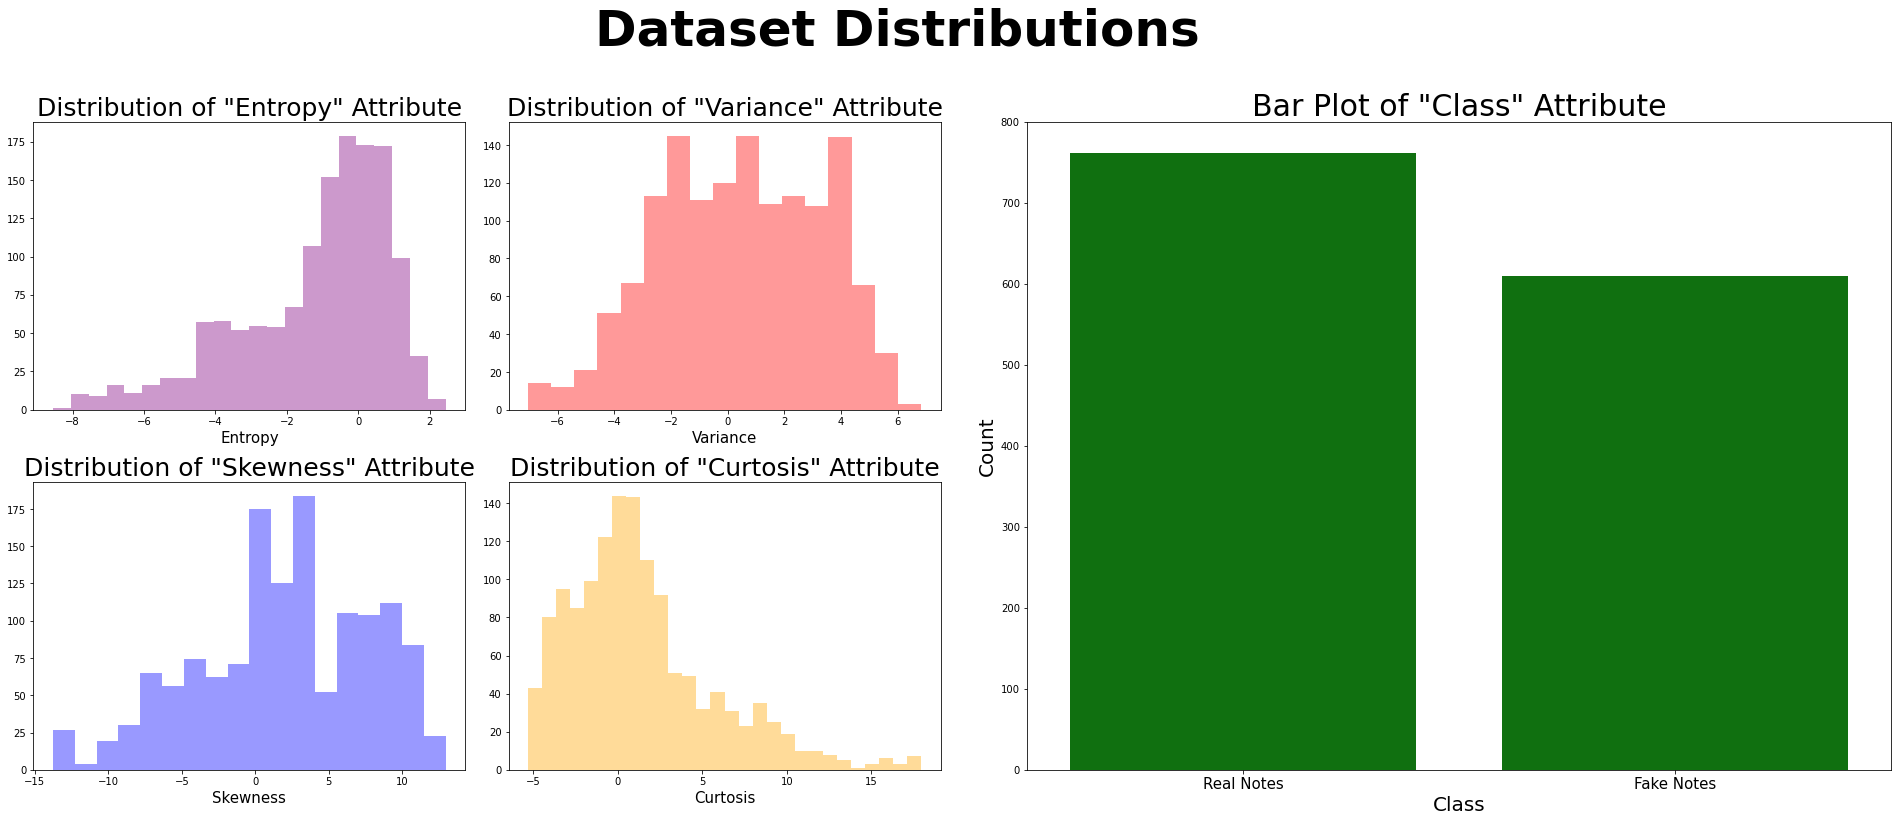

In [11]:
fig = plt.figure()
fig.suptitle(t='Dataset Distributions', x=2, y=2.4, fontsize=50, fontweight='bold')
ax1 = fig.add_axes([0,1,1,1])
sns.distplot(df['entropy'], color='purple', ax=ax1, kde=False)
ax1.set_title('Distribution of "Entropy" Attribute', fontsize=25)
ax1.set_xlabel('Entropy', fontsize=15)
ax2 = fig.add_axes([1.1,1,1,1])
sns.distplot(df['variance'], color='red', ax=ax2, kde=False)
ax2.set_title('Distribution of "Variance" Attribute', fontsize=25)
ax2.set_xlabel('Variance', fontsize=15)
ax3 = fig.add_axes([0,-0.25,1,1])
sns.distplot(df['skewness'], color='blue', ax=ax3, kde=False)
ax3.set_title('Distribution of "Skewness" Attribute', fontsize=25)
ax3.set_xlabel('Skewness', fontsize=15)
ax4 = fig.add_axes([1.1,-0.25,1,1])
sns.distplot(df['curtosis'], color='orange', ax=ax4, kde=False)
ax4.set_title('Distribution of "Curtosis" Attribute', fontsize=25)
ax4.set_xlabel('Curtosis', fontsize=15)
ax5 = fig.add_axes([2.3,-0.25,2,2.25])
sns.barplot(x=df['class'].value_counts().index, y=df['class'].value_counts().values, color='green', ax=ax5)
ax5.set_title('Bar Plot of "Class" Attribute', fontsize=30)
ax5.set_xlabel('Class', fontsize=20)
ax5.set_ylabel('Count', fontsize=20)
ax5.set_xticklabels(labels=['Real Notes', 'Fake Notes'],fontdict={'fontsize':15})
plt.show()

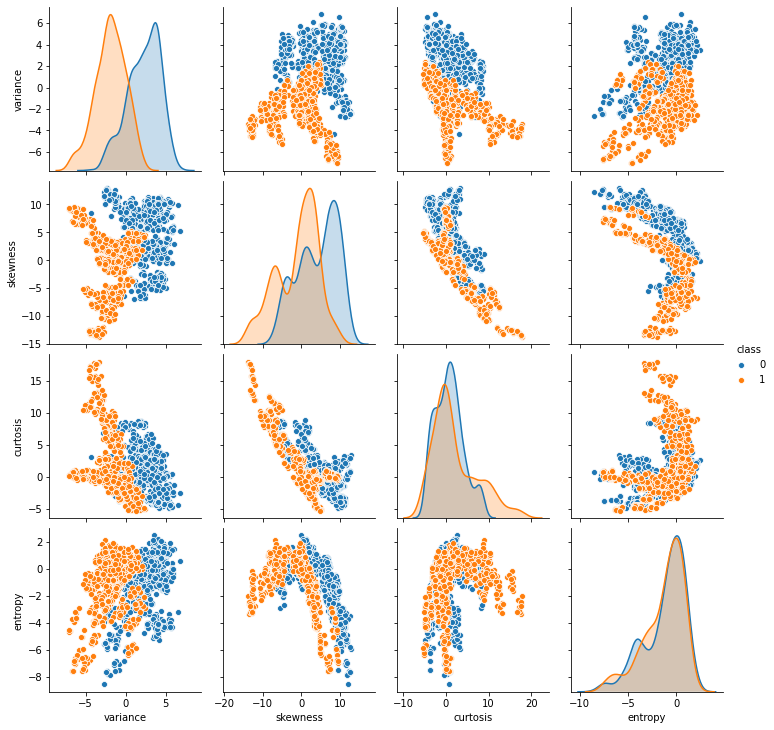

In [12]:
sns.pairplot(df, hue='class')
plt.show()

### Class separates most of the scatter plots into distinct groups.

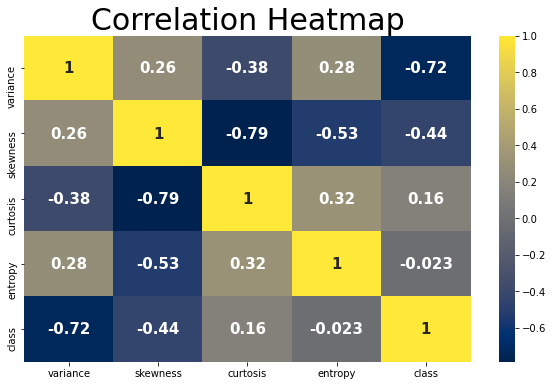

In [13]:
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap', fontsize=30)
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 15, 'fontweight': 'bold'}, cmap='cividis')
plt.show()

### Curtosis and Skewness are have a strong negative correlation.
### Variance and Class have a strong negative correlation.

## Preparing our Data to Build Our Model

In [14]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [15]:
X = df.iloc[:,:-1]
y = df['class']

## Splitting the data into train/test
## Scaling the data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [18]:
X_test

array([[-1.40161022,  0.00380053, -0.28748738, -0.60544127],
       [ 0.31770077,  0.46065296,  0.21305176,  0.6684587 ],
       [-1.56649067, -1.75553029,  2.62694747, -0.12604044],
       ...,
       [ 0.37752872,  0.99347798, -0.99401488,  0.06669456],
       [ 0.28531165,  0.0387362 , -1.09089189,  0.62212394],
       [ 0.49449731,  0.98813508, -0.56431617, -0.61781568]])

# **Model 1: Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
lr = LogisticRegression(solver='liblinear', random_state=1)
lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print(f"Accuracies:\n{accuracies}")
print(f"Mean Accuracy: {accuracies.mean()}")

Accuracies:
[0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy: 0.9835863219349459


In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [23]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.98359161349134
0.9745454545454545


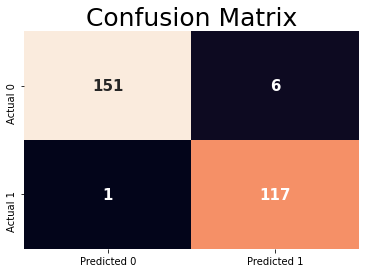

In [24]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.title('Confusion Matrix', fontsize=25)
sns.heatmap(cm, annot=True, fmt='g', annot_kws={'fontsize': 15, 'fontweight': 'bold'}, cbar=False)
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       157
           1       0.95      0.99      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



# **Model 2.1: Support Vector Machine (Linear Kernel)**

In [26]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
accuracies_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10)
print(f"Accuracies:\n{accuracies_svc}")
print(f"Mean Accuracy: {accuracies_svc.mean()}")

Accuracies:
[0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy: 0.9854045037531277


In [27]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

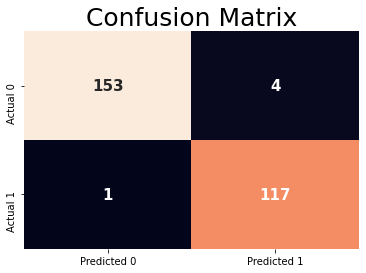

In [28]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.title('Confusion Matrix', fontsize=25)
sns.heatmap(cm, annot=True, fmt='g', annot_kws={'fontsize': 15, 'fontweight': 'bold'}, cbar=False)
plt.show()

# **Model 2.2: Support Vector Machine (Radial Basis Function Kernel)**

In [29]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
accuracies_rbf = cross_val_score(estimator=rbf, X=X_train, y=y_train, cv=10)
print(f"Accuracies:\n{accuracies_rbf}")
print(f"Mean Accuracy: {accuracies_rbf.mean()}")

Accuracies:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [30]:
y_pred = rbf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

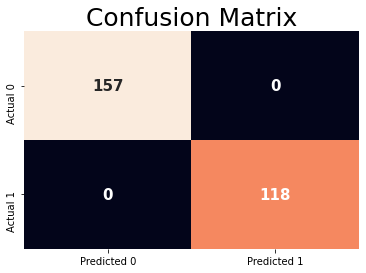

In [31]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.title('Confusion Matrix', fontsize=25)
sns.heatmap(cm, annot=True, fmt='g', annot_kws={'fontsize': 15, 'fontweight': 'bold'}, cbar=False)
plt.show()

 # **Model 3: Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)
accuracies_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
print(f"Accuracies:\n{accuracies_rfc}")
print(f"Mean Accuracy: {accuracies_rfc.mean()}")

Accuracies:
[0.98181818 1.         0.99090909 0.99090909 1.         0.99090909
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9954545454545455


In [33]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

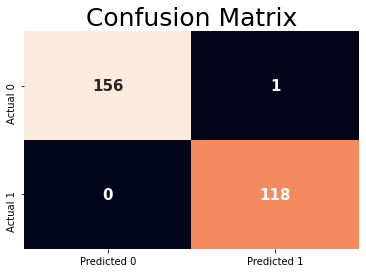

In [34]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.title('Confusion Matrix', fontsize=25)
sns.heatmap(cm, annot=True, fmt='g', annot_kws={'fontsize': 15, 'fontweight': 'bold'}, cbar=False)
plt.show()

# **Model 4: K Neighbors Classifier** (Hyperparameter Tuning Using RandomizedSearchCV)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV
params = {'leaf_size': np.arange(2,31), 'n_neighbors': np.arange(2,15), 'p': np.arange(1,9), 'weights': ['uniform', 'distance']}
rscv = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=params, n_iter=100, random_state=0)

In [36]:
rscv.fit(X_train, y_train)
pred = rscv.predict(X_test)
print(f"Best Parameters: {rscv.best_params_}")
print(f"Accuracy Score: {accuracy_score(y_test, pred)}")

Best Parameters: {'weights': 'distance', 'p': 8, 'n_neighbors': 10, 'leaf_size': 4}
Accuracy Score: 1.0


In [37]:
pd.DataFrame(rscv.cv_results_).sort_values(by='mean_test_score', ascending=False)[['mean_test_score', 'params']][:5]

,mean_test_score,params
21,0.999091,"{'weights': 'uniform', 'p': 3, 'n_neighbors': ..."
13,0.999091,"{'weights': 'distance', 'p': 3, 'n_neighbors':..."
48,0.999091,"{'weights': 'distance', 'p': 8, 'n_neighbors':..."
87,0.999091,"{'weights': 'distance', 'p': 6, 'n_neighbors':..."
24,0.999091,"{'weights': 'distance', 'p': 7, 'n_neighbors':..."


In [38]:
knn = KNeighborsClassifier(n_neighbors=10, leaf_size=4, weights='distance', p=8)
knn.fit(X_train, y_train)
accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print(f"Accuracies:\n{accuracies_knn}")
print(f"Mean Accuracy: {accuracies_knn.mean()}")

Accuracies:
[0.99090909 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9990909090909093


In [39]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

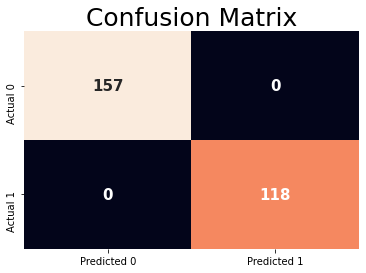

In [40]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.title('Confusion Matrix', fontsize=25)
sns.heatmap(cm, annot=True, fmt='g', annot_kws={'fontsize': 15, 'fontweight': 'bold'}, cbar=False)
plt.show()

In [41]:
print(f"Logistic Regression: {accuracies.mean()}")
print(f"Support Vector Machine(kernel=linear): {accuracies_svc.mean()}")
print(f"Support Vector Machine(kernel=rbf): {accuracies_rbf.mean()}")
print(f"RandomForestClassifier: {accuracies_rfc.mean()}")
print(f"KNeighborsClassifier: {accuracies_knn.mean()}")

Logistic Regression: 0.9835863219349459
Support Vector Machine(kernel=linear): 0.9854045037531277
Support Vector Machine(kernel=rbf): 1.0
RandomForestClassifier: 0.9954545454545455
KNeighborsClassifier: 0.9990909090909093


### Support Vector Machine with an rbf kernel gives us the highest accuracy, without having to change any hyperparameters or overfitting the model.